In [49]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# setting the seaborn context
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

**Exploración preeliminar**

In [2]:
df= pd.read_excel('FORMULARIO.xlsx','FORMULARIOS')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149643 entries, 0 to 149642
Data columns (total 85 columns):
 #   Column                                                                       Non-Null Count   Dtype         
---  ------                                                                       --------------   -----         
 0   ID                                                                           149643 non-null  object        
 1   FORMULARIO_ID                                                                149643 non-null  int64         
 2   FECHA_PUBLICACION                                                            149643 non-null  datetime64[ns]
 3   ESTADO_PUBLICACION                                                           149643 non-null  object        
 4   TIPO_PUBLICACION                                                             149643 non-null  object        
 5   TIPO_DOCUMENTO                                                               149643 no

In [4]:
df.head(10)

,ID,FORMULARIO_ID,FECHA_PUBLICACION,ESTADO_PUBLICACION,TIPO_PUBLICACION,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,DECLARANTE_PJ_RAZON_SOCIAL,DECLARANTE_PJ_UBICACION_PAIS,DECLARANTE_PJ_UBICACION_DPTO,...,POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,DESCRIPC_POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,DESCRIPC_POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,DESCRIPC_POSIBLE_CONFLICTO_INTERES_ADICIONAL,CONFL_INTERES_INTERESES_DIRECTOS,CONFL_INTERES_FIDEICOMISOS,CONFL_INTERES_INVERSIONES
0,N-1088004864-0347-179771,179771,2021-07-01 10:10:20.037,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1088004864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
1,N-65776977-6127-179743,179743,2021-07-01 10:07:57.240,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,65776977,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
2,N-1102366838-0394-179749,179749,2021-07-01 10:07:41.775,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1102366838,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
3,N-1093230050-1093-179767,179767,2021-07-01 10:07:27.813,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1093230050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
4,N-30396723--179748,179748,2021-07-01 10:06:27.805,EN REVISION,INGRESO,CEDULA DE CIUDADANIA,30396723,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
5,N-80410929-0896-179754,179754,2021-07-01 10:04:58.594,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,80410929,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
6,N-1002538086--179762,179762,2021-07-01 10:04:40.040,EN REVISION,INGRESO,CEDULA DE CIUDADANIA,1002538086,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
7,N-36346879-3369-179759,179759,2021-07-01 10:04:01.145,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,36346879,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
8,N-27315299-0386-179760,179760,2021-07-01 10:02:34.407,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,27315299,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN
9,N-800214001-0391-179758,179758,2021-07-01 10:00:02.542,FINALIZADO,INGRESO,NIT-NÚMERO DE IDENTIFICACIÓN TRIBUTARIA,800214001,FITCH RATINGS COLOMBIA S.A.,Colombia,Bogotá D.C,...,NO,NaN,NO,NaN,NaN,NO,NaN,NaN,NaN,NaN


Se eliminan columnas CONFL_INTERES_INTERESES_DIRECTOS,CONFL_INTERES_FIDEICOMISOS, CONFL_INTERES_INVERSIONES, ENTIDAD_NO_ENCONTRADA_ORDEN, ARCHIVO_RENTA_DIAN,ARCHIVO_APORTES_CAMPANA, por ser nulas en todos los campos     

In [5]:
df=df.drop(['CONFL_INTERES_INTERESES_DIRECTOS','CONFL_INTERES_FIDEICOMISOS','CONFL_INTERES_INVERSIONES','ENTIDAD_NO_ENCONTRADA_ORDEN','ARCHIVO_RENTA_DIAN','ARCHIVO_APORTES_CAMPANA'],axis=1)

In [6]:
df.drop_duplicates()

,ID,FORMULARIO_ID,FECHA_PUBLICACION,ESTADO_PUBLICACION,TIPO_PUBLICACION,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,DECLARANTE_PJ_RAZON_SOCIAL,DECLARANTE_PJ_UBICACION_PAIS,DECLARANTE_PJ_UBICACION_DPTO,...,MUNIC_DOMICILIO_REP_LEGAL_PJ,POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD,DESCRIPC_POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD,POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,DESCRIPC_POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,DESCRIPC_POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,DESCRIPC_POSIBLE_CONFLICTO_INTERES_ADICIONAL
0,N-1088004864-0347-179771,179771,2021-07-01 10:10:20.037,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1088004864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
1,N-65776977-6127-179743,179743,2021-07-01 10:07:57.240,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,65776977,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
2,N-1102366838-0394-179749,179749,2021-07-01 10:07:41.775,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1102366838,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
3,N-1093230050-1093-179767,179767,2021-07-01 10:07:27.813,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1093230050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
4,N-30396723--179748,179748,2021-07-01 10:06:27.805,EN REVISION,INGRESO,CEDULA DE CIUDADANIA,30396723,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149638,N-1073808841-6133-449,449,2021-01-01 09:38:25.725,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1073808841,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
149639,N-1032472774-0261-1068,1068,2021-01-01 08:23:16.540,FINALIZADO,OTRO,CEDULA DE CIUDADANIA,1032472774,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
149640,N-79808921-0284-1786,1786,2021-01-01 01:49:09.780,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,79808921,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
149641,N-23857642-0029-1785,1785,2021-01-01 01:48:25.400,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,23857642,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN


No hay filas identicas, sin embargo esto no excluye existencia de duplicados, y multiples registros por persona

In [7]:
df.describe()

,FORMULARIO_ID,ANO_GRAVABLE_DECLARAC_BYR,SALARIOS_INGRESOS_LABORALES,CESANTIAS_INTERESES,GASTOS_REPRESENTACION,ARRIENDOS,HONORARIOS,OTROS_INGRESOS_RENTAS,INGRESOS_ACTIVIDAD_ORDINARIA,INGRESOS_NO_OPERACIONALES,OTROS_INGRESOS,TOTAL_INGRESOS,CONYUGE_COMPANERO_PERMANENTE_NUM_DOC
count,149643.000000,149643.000000,1.002910e+05,5.640000e+04,4.575400e+04,4.817700e+04,8.498100e+04,5.651200e+04,2.265000e+03,1.824000e+03,1.295000e+03,1.496430e+05,1.791000e+03
mean,88146.505623,2019.912632,5.569131e+07,3.143600e+06,4.268719e+06,2.026198e+06,3.333095e+07,1.949342e+07,4.731890e+10,2.068812e+09,1.229605e+09,8.188345e+08,3.466778e+08
std,52307.267887,0.289110,1.473361e+09,8.545350e+07,2.669078e+08,2.347183e+07,4.648100e+08,8.073300e+08,2.885703e+11,1.653488e+10,2.113846e+10,3.713374e+10,5.724738e+08
min,12.000000,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,42315.500000,2020.000000,6.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.614850e+08,1.000000e+03,0.000000e+00,1.207406e+07,3.467332e+07
50%,83329.000000,2020.000000,2.100000e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.466050e+07,0.000000e+00,1.574082e+09,1.013970e+07,0.000000e+00,3.000000e+07,6.329148e+07
75%,134813.500000,2020.000000,4.100000e+07,2.000000e+06,0.000000e+00,0.000000e+00,3.844833e+07,3.054308e+06,7.758292e+09,1.485050e+08,1.776950e+07,5.399695e+07,1.019019e+09
max,179771.000000,2021.000000,2.560890e+11,1.216400e+10,5.340100e+10,3.911280e+09,8.008960e+10,1.246581e+11,5.077279e+12,4.058487e+11,7.206710e+11,5.077279e+12,1.081139e+10


In [8]:
df.describe(include=[object])

,ID,ESTADO_PUBLICACION,TIPO_PUBLICACION,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,DECLARANTE_PJ_RAZON_SOCIAL,DECLARANTE_PJ_UBICACION_PAIS,DECLARANTE_PJ_UBICACION_DPTO,DECLARANTE_PJ_UBICACION_MUN,DECLARANTE_PN_PRIMER_NOMBRE,...,MUNIC_DOMICILIO_REP_LEGAL_PJ,POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD,DESCRIPC_POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD,POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,DESCRIPC_POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,DESCRIPC_POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,DESCRIPC_POSIBLE_CONFLICTO_INTERES_ADICIONAL
count,149643,149643,149643,149643,149643,2407,2407,2399,2399,147236,...,2395,2407,56,2407,39,2407,40,2066,149643,1110
unique,149617,2,4,6,129652,1960,6,32,155,10325,...,146,2,40,2,31,2,30,1514,2,931
top,N-79691590-5937-109622,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,80541200,AC LATIN SOFTWARE SAS,Colombia,Bogotá D.C,BOGOTÁ,JUAN,...,BOGOTÁ,NO,NINGUNO,NO,NINGUNO,NO,NINGUNO,UNICEF;600000,NO,NINGUNO
freq,3,121006,101032,146998,15,14,2394,1290,1290,4370,...,1267,2347,9,2364,7,2362,6,38,148389,44


In [9]:
df['TIPO_DOCUMENTO'].value_counts()

CEDULA DE CIUDADANIA                       146998
NIT-NÚMERO DE IDENTIFICACIÓN TRIBUTARIA      2407
CEDULA DE EXTRANJERIA                         208
PASAPORTE                                      17
LIBRETA MILITAR                                11
TARJETA DE IDENTIDAD                            2
Name: TIPO_DOCUMENTO, dtype: int64

Crear bases separadas a partir de este conteo.

In [10]:
pjuridica = df[df['TIPO_DOCUMENTO'] == 'NIT-NÚMERO DE IDENTIFICACIÓN TRIBUTARIA']

In [11]:
pnatural = df[df['TIPO_DOCUMENTO'] != 'NIT-NÚMERO DE IDENTIFICACIÓN TRIBUTARIA']

Limpieza de columnas con todos los valores nulos

In [12]:
pnatural=pnatural.drop(['DECLARANTE_PJ_RAZON_SOCIAL','DECLARANTE_PJ_UBICACION_PAIS','DECLARANTE_PJ_UBICACION_DPTO','DECLARANTE_PJ_UBICACION_MUN','INGRESOS_ACTIVIDAD_ORDINARIA','INGRESOS_NO_OPERACIONALES','OTROS_INGRESOS',
                       'PRIMER_NOMBRE_REP_LEGAL_PJ','SEGUNDO_NOMBRE_REP_LEGAL_PJ','PRIMER_APELLIDO_REP_LEGAL_PJ','SEGUNDO_APELLIDO_REP_LEGAL_PJ',
                       'TIPO_DOCUMENTO_REP_LEGAL_PJ','NUMERO_DOCUMENTO_REP_LEGAL_PJ','PAIS_NACIMIENTO_REP_LEGAL_PJ','DEPTO_NACIMIENTO_REP_LEGAL_PJ',
                       'MUNICIPIO_NACIMIENTO_REP_LEGAL_PJ','PAIS_DOMICILIO_REP_LEGAL_PJ','DEPTO_DOMICILIO_REP_LEGAL_PJ','MUNIC_DOMICILIO_REP_LEGAL_PJ',
                       'POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD','DESCRIPC_POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD','POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES',
                       'DESCRIPC_POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES','POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD','DESCRIPC_POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD'],axis=1)
pnatural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147236 entries, 0 to 149642
Data columns (total 54 columns):
 #   Column                                                         Non-Null Count   Dtype         
---  ------                                                         --------------   -----         
 0   ID                                                             147236 non-null  object        
 1   FORMULARIO_ID                                                  147236 non-null  int64         
 2   FECHA_PUBLICACION                                              147236 non-null  datetime64[ns]
 3   ESTADO_PUBLICACION                                             147236 non-null  object        
 4   TIPO_PUBLICACION                                               147236 non-null  object        
 5   TIPO_DOCUMENTO                                                 147236 non-null  object        
 6   NUMERO_DOCUMENTO                                               147236 non-null  obje

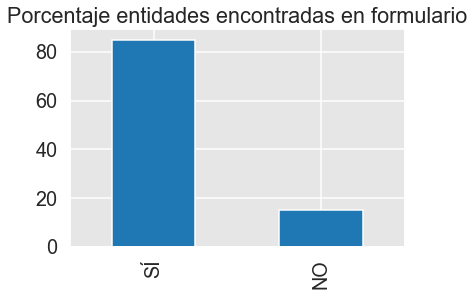

In [65]:
# gráfico de barras de frecuencias relativas.
plot = (100 * pnatural['ENCONTRO_ENTIDAD'].value_counts() / len(pnatural['ENCONTRO_ENTIDAD'])).plot(
kind='bar', title='Porcentaje entidades encontradas en formulario')

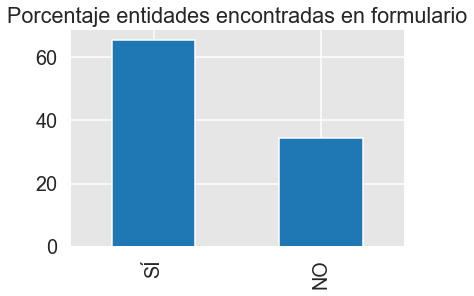

In [74]:
# gráfico de barras de frecuencias relativas.
plot = (100 * pjuridica['ENCONTRO_ENTIDAD'].value_counts() / len(pjuridica['ENCONTRO_ENTIDAD'])).plot(
kind='bar', title='Porcentaje entidades encontradas en formulario')

In [76]:
enti=(100 * pjuridica['ENCONTRO_ENTIDAD'].value_counts() / len(pjuridica['ENCONTRO_ENTIDAD']))

In [77]:
enti

SÍ    65.600332
NO    34.399668
Name: ENCONTRO_ENTIDAD, dtype: float64

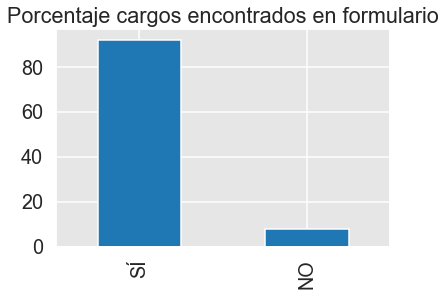

In [66]:
plot = (100 * pnatural['ENCONTRO_CARGO'].value_counts() / len(pnatural['ENCONTRO_CARGO'])).plot(
kind='bar', title='Porcentaje cargos encontrados en formulario')

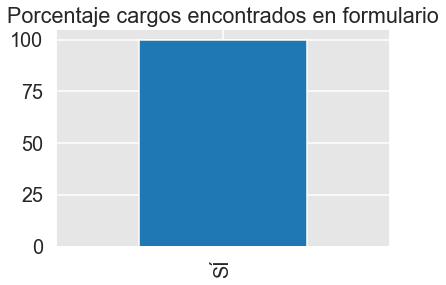

In [75]:
plot = (100 * pjuridica['ENCONTRO_CARGO'].value_counts() / len(pjuridica['ENCONTRO_CARGO'])).plot(
kind='bar', title='Porcentaje cargos encontrados en formulario')

In [72]:
print(100 * pnatural['ENCONTRO_CARGO'].value_counts() / len(pnatural['ENCONTRO_CARGO']))

SÍ    92.188052
NO     7.811948
Name: ENCONTRO_CARGO, dtype: float64


In [13]:
pjuridica=pjuridica.drop(['DECLARANTE_PN_PRIMER_NOMBRE','DECLARANTE_PN_SEGUNDO_NOMBRE','DECLARANTE_PN_PRIMER_APELLIDO','DECLARANTE_PN_SEGUNDO_APELLIDO',
                          'DECLARANTE_PN_NACIMIENTO_PAIS','DECLARANTE_PN_NACIMIENTO_DPTO','DECLARANTE_PN_NACIMIENTO_MUN','DECLARANTE_PN_DOMICILIO_PAIS',
                          'DECLARANTE_PN_DOMICILIO_DPTO','DECLARANTE_PN_DOMICILIO_MUN','CARGO_DECLARANTE','CARGO_NO_ENCONTRADO_DENOMINACION_OTRO',
                          'SALARIOS_INGRESOS_LABORALES','CESANTIAS_INTERESES','GASTOS_REPRESENTACION','ARRIENDOS','HONORARIOS','OTROS_INGRESOS_RENTAS',
                          'PARTICIP_JUNTAS_CONSEJOS_DIRECT','PARTICIP_CORP_SOCIED_ASOC','ACT_ECONOM_PRIVADAS','TIENE_CONYUGE_COMPANERO_PERMANENTE',
                          'CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES','CONYUGE_COMPANERO_PERMANENTE_PNOMBRE','CONYUGE_COMPANERO_PERMANENTE_SNOMBRE',
                          'CONYUGE_COMPANERO_PERMANENTE_PAPELLIDO','CONYUGE_COMPANERO_PERMANENTE_SAPELLIDO','CONYUGE_COMPANERO_PERMANENTE_TIPO_DOC',
                          'CONYUGE_COMPANERO_PERMANENTE_NUM_DOC','DESCRIPC_POSIBLE_CONFL_INTERES_CONYUGE_COMPANERO_PERMANENTE','CONFL_INTERES_PARIENTES'],axis=1)
pjuridica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 9 to 149218
Data columns (total 48 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   ID                                                                           2407 non-null   object        
 1   FORMULARIO_ID                                                                2407 non-null   int64         
 2   FECHA_PUBLICACION                                                            2407 non-null   datetime64[ns]
 3   ESTADO_PUBLICACION                                                           2407 non-null   object        
 4   TIPO_PUBLICACION                                                             2407 non-null   object        
 5   TIPO_DOCUMENTO                                                               2407 non-null   ob

In [14]:
pnatural.describe(include=[object])

,ID,ESTADO_PUBLICACION,TIPO_PUBLICACION,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,DECLARANTE_PN_PRIMER_NOMBRE,DECLARANTE_PN_SEGUNDO_NOMBRE,DECLARANTE_PN_PRIMER_APELLIDO,DECLARANTE_PN_SEGUNDO_APELLIDO,DECLARANTE_PN_NACIMIENTO_PAIS,...,CONYUGE_COMPANERO_PERMANENTE_PNOMBRE,CONYUGE_COMPANERO_PERMANENTE_SNOMBRE,CONYUGE_COMPANERO_PERMANENTE_PAPELLIDO,CONYUGE_COMPANERO_PERMANENTE_SAPELLIDO,CONYUGE_COMPANERO_PERMANENTE_TIPO_DOC,DESCRIPC_POSIBLE_CONFL_INTERES_CONYUGE_COMPANERO_PERMANENTE,CONFL_INTERES_PARIENTES,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,DESCRIPC_POSIBLE_CONFLICTO_INTERES_ADICIONAL
count,147236,147236,147236,147236,147236,147236,121341,147235,144276,147092,...,1791,1429,1791,1683,1791,1733,5778,1898,147236,1067
unique,147210,2,4,5,127753,10325,6775,6470,6429,51,...,676,441,734,724,3,1075,5755,1386,2,904
top,N-79691590-5937-109622,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,80541200,JUAN,ANDRES,RODRIGUEZ,RODRIGUEZ,Colombia,...,MARIA,MARIA,RODRIGUEZ,RODRIGUEZ,CEDULA DE CIUDADANIA,NINGUNO,Padre;ALEJANDRO RAFAEL MAESTRE PALMERA;CEDULA ...,UNICEF;600000,NO,NINGUNO
freq,3,119427,99080,146998,15,4370,3566,2673,2753,146331,...,71,46,34,27,1781,115,2,38,146032,36


In [15]:
pjuridica.describe(include=[object])

,ID,ESTADO_PUBLICACION,TIPO_PUBLICACION,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,DECLARANTE_PJ_RAZON_SOCIAL,DECLARANTE_PJ_UBICACION_PAIS,DECLARANTE_PJ_UBICACION_DPTO,DECLARANTE_PJ_UBICACION_MUN,NOMBRE_ENTIDAD,...,MUNIC_DOMICILIO_REP_LEGAL_PJ,POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD,DESCRIPC_POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD,POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,DESCRIPC_POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,DESCRIPC_POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,DESCRIPC_POSIBLE_CONFLICTO_INTERES_ADICIONAL
count,2407,2407,2407,2407,2407,2407,2407,2399,2399,1579,...,2395,2407,56,2407,39,2407,40,168,2407,43
unique,2407,2,3,1,1901,1960,6,32,155,296,...,146,2,40,2,31,2,30,133,2,35
top,N-900415881-0364-142575,FINALIZADO,INGRESO,NIT-NÚMERO DE IDENTIFICACIÓN TRIBUTARIA,830049526,AC LATIN SOFTWARE SAS,Colombia,Bogotá D.C,BOGOTÁ,FISCALIA GENERAL DE LA NACION,...,BOGOTÁ,NO,NINGUNO,NO,NINGUNO,NO,NINGUNO,FUNDACION SOCIAL DE EMPLEADOS DE ICONTEC;21056000,NO,NINGUNO
freq,1,1579,1952,2407,14,14,2394,1290,1290,238,...,1267,2347,9,2364,7,2362,6,10,2357,8


In [16]:
df['FECHA']=pd.to_datetime(df['FECHA_PUBLICACION'],format='%Y%m%d')



In [17]:
df['FECHA'] = df['FECHA'].dt.strftime('%Y/%m/%d')

In [18]:
df.head(10)

,ID,FORMULARIO_ID,FECHA_PUBLICACION,ESTADO_PUBLICACION,TIPO_PUBLICACION,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,DECLARANTE_PJ_RAZON_SOCIAL,DECLARANTE_PJ_UBICACION_PAIS,DECLARANTE_PJ_UBICACION_DPTO,...,POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD,DESCRIPC_POSIBLE_CONFL_INTERES_REP_LEGAL_CON_ENTIDAD,POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,DESCRIPC_POSIBLE_CONFL_INTERES_PJ_POR_LITIGIO_CONTROVERSIA_O_DENUNC_PENALES,POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,DESCRIPC_POSIBLE_CONFL_INTERES_POR_AMISTAD_O_ENEMISTAD,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,DESCRIPC_POSIBLE_CONFLICTO_INTERES_ADICIONAL,FECHA
0,N-1088004864-0347-179771,179771,2021-07-01 10:10:20.037,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1088004864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
1,N-65776977-6127-179743,179743,2021-07-01 10:07:57.240,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,65776977,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
2,N-1102366838-0394-179749,179749,2021-07-01 10:07:41.775,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1102366838,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
3,N-1093230050-1093-179767,179767,2021-07-01 10:07:27.813,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,1093230050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
4,N-30396723--179748,179748,2021-07-01 10:06:27.805,EN REVISION,INGRESO,CEDULA DE CIUDADANIA,30396723,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
5,N-80410929-0896-179754,179754,2021-07-01 10:04:58.594,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,80410929,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
6,N-1002538086--179762,179762,2021-07-01 10:04:40.040,EN REVISION,INGRESO,CEDULA DE CIUDADANIA,1002538086,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
7,N-36346879-3369-179759,179759,2021-07-01 10:04:01.145,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,36346879,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
8,N-27315299-0386-179760,179760,2021-07-01 10:02:34.407,FINALIZADO,INGRESO,CEDULA DE CIUDADANIA,27315299,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,2021/07/01
9,N-800214001-0391-179758,179758,2021-07-01 10:00:02.542,FINALIZADO,INGRESO,NIT-NÚMERO DE IDENTIFICACIÓN TRIBUTARIA,800214001,FITCH RATINGS COLOMBIA S.A.,Colombia,Bogotá D.C,...,NO,NaN,NO,NaN,NO,NaN,NaN,NO,NaN,2021/07/01


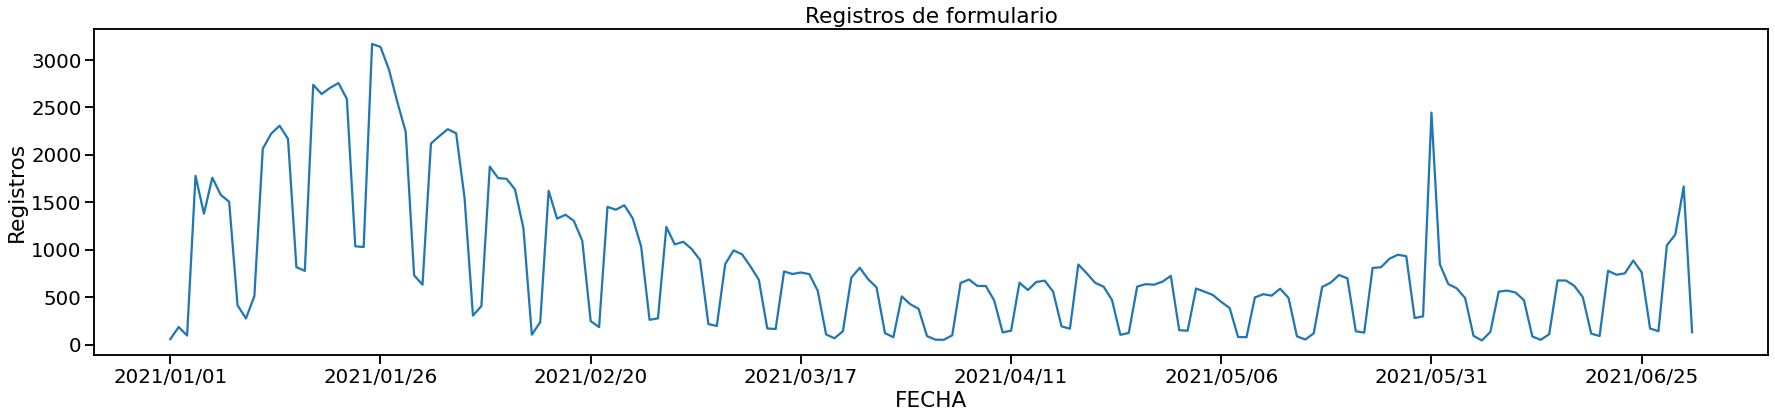

In [19]:
fig, ax = plt.subplots(figsize=(30,6))
plt.title("Registros de formulario")
ax.set_xlabel("Fecha")
ax.set_ylabel("Registros")
df.groupby("FECHA")['ID'].nunique().plot()
plt.show()

In [20]:
Registros_tipo = df.groupby(["FECHA","TIPO_PUBLICACION"])['ID'].nunique().reset_index()

In [28]:
from matplotlib import dates

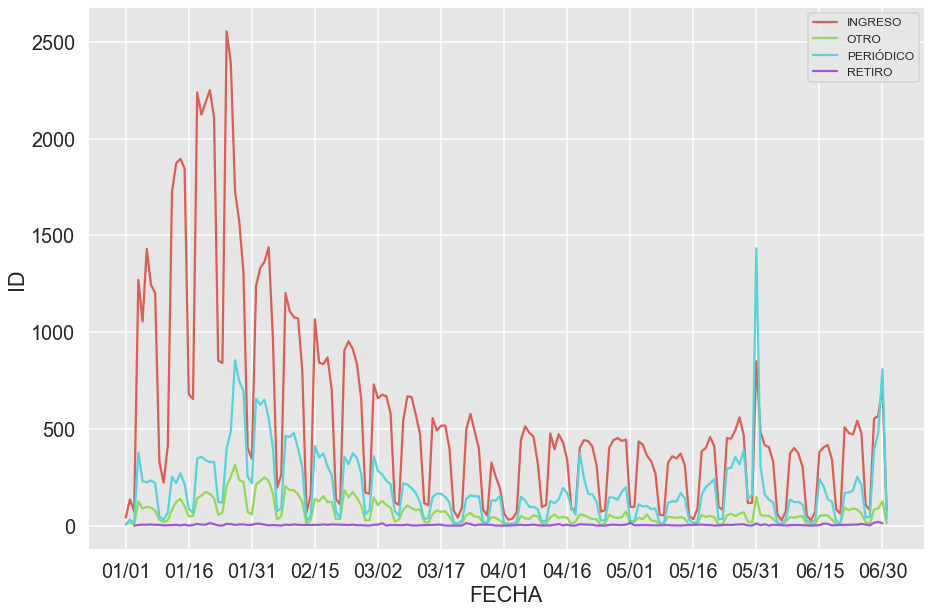

In [50]:
palette = sns.color_palette("hls", len(Registros_tipo['TIPO_PUBLICACION'].unique()))
fig, ax = plt.subplots(figsize=(15,10))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m/%d"))
plt.xticks([0, 15, 30, 45,60,75,90,105,120,135,150,165,180])
sns.lineplot(data = Registros_tipo, x = 'FECHA', y ='ID', hue='TIPO_PUBLICACION', palette = palette)
plt.legend(fontsize = 12, loc ='upper right')


In [36]:
pnatural['FECHA']=pd.to_datetime(pnatural['FECHA_PUBLICACION'],format='%Y%m%d')

In [37]:
pnatural['FECHA'] = pnatural['FECHA'].dt.strftime('%Y/%m/%d')

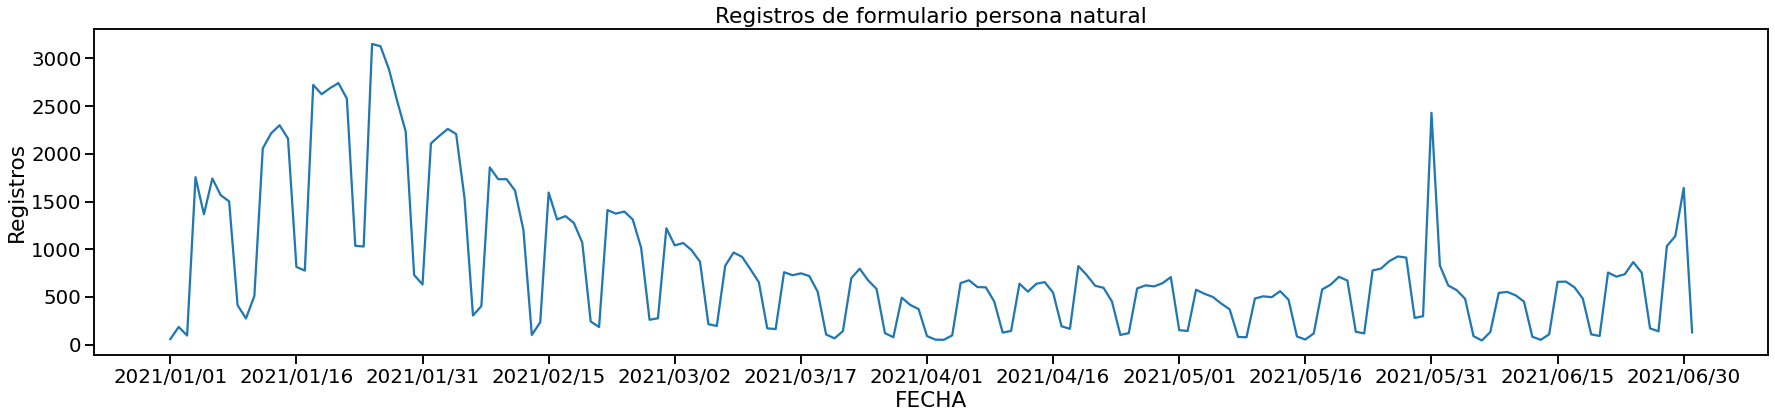

In [39]:
fig, ax = plt.subplots(figsize=(30,6))
plt.title("Registros de formulario persona natural")
ax.set_xlabel("Fecha")
ax.set_ylabel("Registros")
ax.xaxis.set_major_formatter(dates.DateFormatter("%m/%d"))
plt.xticks([0, 15, 30, 45,60,75,90,105,120,135,150,165,180])
pnatural.groupby("FECHA")['ID'].nunique().plot()
plt.show()

In [40]:
Registros_tipo_n = pnatural.groupby(["FECHA","TIPO_PUBLICACION"])['ID'].nunique().reset_index()

In [41]:
Registros_tipo_n

,FECHA,TIPO_PUBLICACION,ID
0,2021/01/01,INGRESO,42
1,2021/01/01,OTRO,6
2,2021/01/01,PERIÓDICO,9
3,2021/01/02,INGRESO,136
4,2021/01/02,OTRO,18
...,...,...,...
689,2021/06/30,PERIÓDICO,808
690,2021/06/30,RETIRO,13
691,2021/07/01,INGRESO,77
692,2021/07/01,OTRO,14


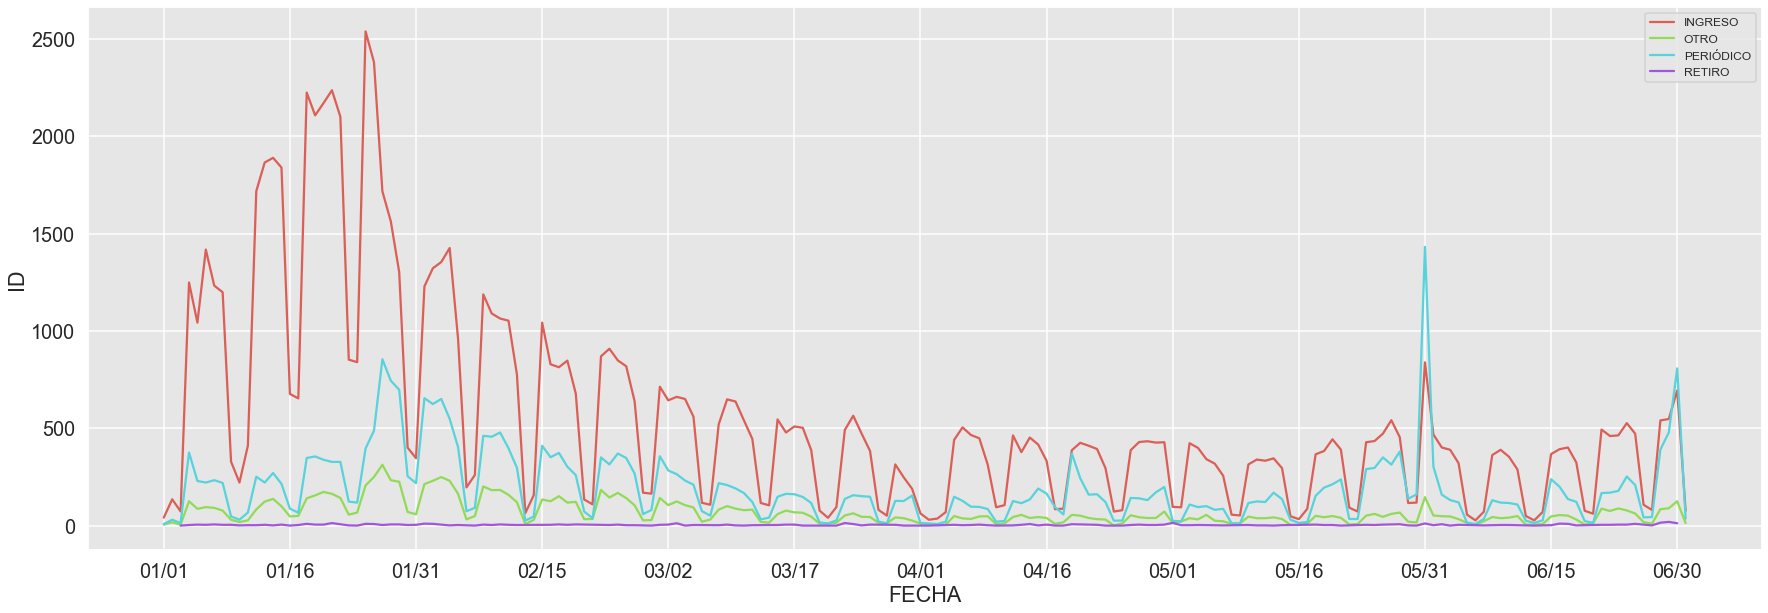

In [136]:
palette = sns.color_palette("hls", len(Registros_tipo_n['TIPO_PUBLICACION'].unique()))
fig, ax = plt.subplots(figsize=(30,10))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m/%d"))
plt.xticks([0, 15, 30, 45,60,75,90,105,120,135,150,165,180])
sns.lineplot(data = Registros_tipo_n, x = 'FECHA', y ='ID', hue='TIPO_PUBLICACION', palette = palette)
plt.legend(fontsize = 12, loc ='upper right')

In [43]:
pjuridica['FECHA']=pd.to_datetime(pjuridica['FECHA_PUBLICACION'],format='%Y%m%d')

In [44]:
pjuridica['FECHA'] = pjuridica['FECHA'].dt.strftime('%Y/%m/%d')

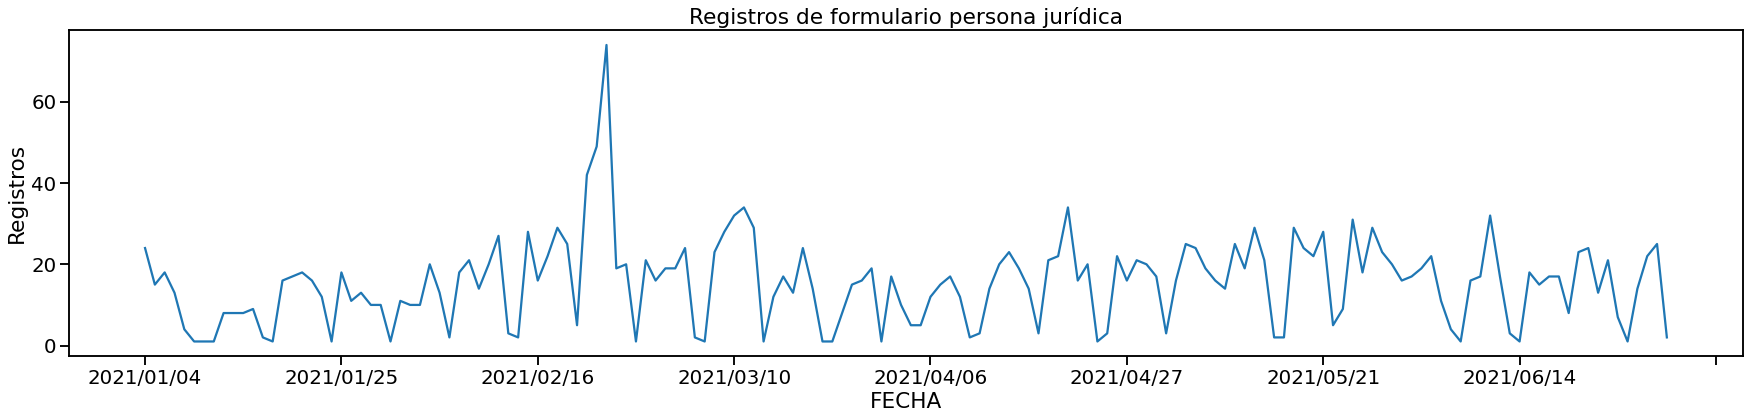

In [45]:
fig, ax = plt.subplots(figsize=(30,6))
plt.title("Registros de formulario persona jurídica")
ax.set_xlabel("Fecha")
ax.set_ylabel("Registros")
pjuridica.groupby("FECHA")['ID'].nunique().plot()
plt.show()

In [46]:
Registros_tipo_j = pjuridica.groupby(["FECHA","TIPO_PUBLICACION"])['ID'].nunique().reset_index()

In [47]:
Registros_tipo_j

,FECHA,TIPO_PUBLICACION,ID
0,2021/01/04,INGRESO,21
1,2021/01/04,PERIÓDICO,3
2,2021/01/05,INGRESO,13
3,2021/01/05,OTRO,2
4,2021/01/06,INGRESO,13
...,...,...,...
340,2021/06/29,INGRESO,20
341,2021/06/29,PERIÓDICO,2
342,2021/06/30,INGRESO,24
343,2021/06/30,PERIÓDICO,1


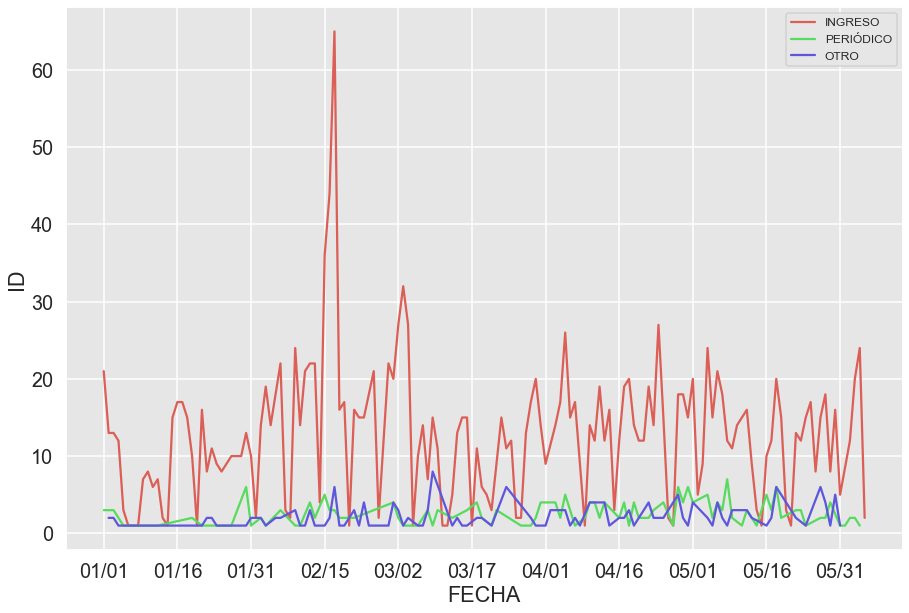

In [52]:
palette = sns.color_palette("hls", len(Registros_tipo_j['TIPO_PUBLICACION'].unique()))
fig, ax = plt.subplots(figsize=(15,10))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m/%d"))
plt.xticks([0, 15, 30, 45,60,75,90,105,120,135,150,165,180])
sns.lineplot(data = Registros_tipo_j, x = 'FECHA', y ='ID', hue='TIPO_PUBLICACION', palette = palette)
plt.legend(fontsize = 12, loc ='upper right')

In [53]:
import re

def cuentas(x):

    y=0

    x = re.sub("[^0-9|]","",str(x))

    x = x.split("|")

    for i in x:
        try:
            y=y+int(i)
        except ValueError:
            y = 0
    return y


In [54]:
pnatural['SALDO_BANCARIO'] = pnatural['CTAS_BANCARIAS'].apply(cuentas)

In [55]:
pnatural[['CTAS_BANCARIAS','SALDO_BANCARIO']]

,CTAS_BANCARIAS,SALDO_BANCARIO
0,AHORROS;Colombia;0,0
1,AHORROS;Colombia;7000,7000
2,AHORROS;Colombia;20000,20000
3,AHORROS;Colombia;0,0
4,AHORROS;Colombia;1332452,1332452
...,...,...
149638,AHORROS;Colombia;0,0
149639,AHORROS;Colombia;1953827|AHORROS;Colombia;2193,1956020
149640,CORRIENTE;Colombia;5000000,5000000
149641,AHORROS;Colombia;500000|AHORROS;Colombia;90000,590000


In [53]:
pnatural[["SALDO_BANCARIO"]].describe()

,SALDO_BANCARIO
count,1.472360e+05
mean,1.082257e+12
std,3.410461e+14
min,0.000000e+00
25%,3.440000e+02
50%,6.078125e+05
75%,3.997386e+06
max,1.306931e+17


In [54]:
pjuridica['SALDO_BANCARIO'] = pjuridica['CTAS_BANCARIAS'].apply(cuentas)

In [55]:
pjuridica[['CTAS_BANCARIAS','SALDO_BANCARIO']]

,CTAS_BANCARIAS,SALDO_BANCARIO
9,CORRIENTE;Colombia;3993259|AHORROS;Colombia;12...,12292919588
75,AHORROS;Colombia;4926000,4926000
352,NaN,0
392,AHORROS;Colombia;20000000,20000000
416,AHORROS;Colombia;20000000,20000000
...,...,...
148933,NaN,0
148951,AHORROS;Colombia;28600000,28600000
148997,AHORROS;Colombia;5000000,5000000
149126,CORRIENTE;Colombia;391866308,391866308


In [56]:
pjuridica[["SALDO_BANCARIO"]].describe()

,SALDO_BANCARIO
count,2.407000e+03
mean,2.262448e+10
std,3.269060e+11
min,0.000000e+00
25%,1.089296e+06
50%,6.724700e+07
75%,6.064202e+08
max,1.433524e+13


In [56]:
pnatural_new = pnatural[['NUMERO_DOCUMENTO','TIPO_PUBLICACION','NOMBRE_ENTIDAD','ENTIDAD_NO_ENCONTRADA_NOMBRE','DECLARANTE_ES_CONTRATISTA',
                         'CARGO_DECLARANTE','CARGO_NO_ENCONTRADO_DENOMINACION','TOTAL_INGRESOS','SALDO_BANCARIO','BIENES_PATRIMONIALES','ACREENCIAS_OBLIGACIONES',
                         'CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES','CONFL_INTERES_PARIENTES','CONFL_INTERES_DONACIONES','POSIBLE_CONFLICTO_INTERES_ADICIONAL']]

In [59]:
pnatural_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147236 entries, 0 to 149642
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   NUMERO_DOCUMENTO                                               147236 non-null  object 
 1   TIPO_PUBLICACION                                               147236 non-null  object 
 2   NOMBRE_ENTIDAD                                                 125152 non-null  object 
 3   ENTIDAD_NO_ENCONTRADA_NOMBRE                                   36797 non-null   object 
 4   DECLARANTE_ES_CONTRATISTA                                      147236 non-null  object 
 5   CARGO_DECLARANTE                                               4996 non-null    object 
 6   CARGO_NO_ENCONTRADO_DENOMINACION                               12002 non-null   object 
 7   TOTAL_INGRESOS                                 

In [60]:
pnatural_new=pnatural_new.drop_duplicates()


In [61]:
pnatural_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144946 entries, 0 to 149642
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   NUMERO_DOCUMENTO                                               144946 non-null  object 
 1   TIPO_PUBLICACION                                               144946 non-null  object 
 2   NOMBRE_ENTIDAD                                                 123139 non-null  object 
 3   ENTIDAD_NO_ENCONTRADA_NOMBRE                                   36341 non-null   object 
 4   DECLARANTE_ES_CONTRATISTA                                      144946 non-null  object 
 5   CARGO_DECLARANTE                                               4983 non-null    object 
 6   CARGO_NO_ENCONTRADO_DENOMINACION                               11974 non-null   object 
 7   TOTAL_INGRESOS                                 

In [62]:
pnatural_new['TIPO_PUBLICACION'].value_counts()

INGRESO      97521
PERIÓDICO    34602
OTRO         12109
RETIRO         714
Name: TIPO_PUBLICACION, dtype: int64

In [63]:
pnatural_new['NOMBRE_ENTIDAD'].value_counts()

SERVICIO NACIONAL DE APRENDIZAJE                                                  24472
UNIVERSIDAD TECNOLOGICA DE PEREIRA                                                 2172
CORPORACION AUTONOMA REGIONAL DE CUNDINAMARCA                                      2165
SECRETARÍA DISTRITAL DE MOVILIDAD                                                  1950
UNIDAD ADMINISTRATIVA ESPECIAL DE GESTIÓN DE RESTITUCIÓN DE TIERRAS DESPOJADAS     1923
                                                                                  ...  
JUZGADO 001 DE FAMILIA  DE PEREIRA                                                    1
ALCALDÍA DE SUAREZ - TOLIMA                                                           1
CONCEJO DE AIPE                                                                       1
ALCALDÍA DE RECETOR                                                                   1
JUZGADO 082 CIVIL MUNICIPAL DE BOGOTÁ                                                 1
Name: NOMBRE_ENTIDAD, Length: 22

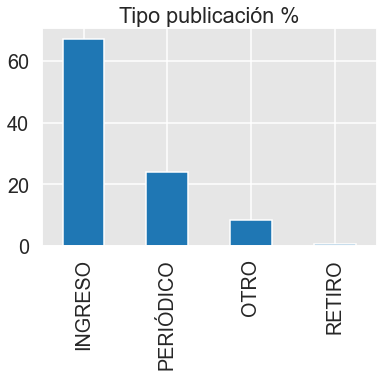

In [64]:
# gráfico de barras de frecuencias relativas.
plot = (100 * pnatural_new['TIPO_PUBLICACION'].value_counts() / len(pnatural_new['TIPO_PUBLICACION'])).plot(
kind='bar', title='Tipo publicación %')

In [78]:
print(100 * pnatural_new['TIPO_PUBLICACION'].value_counts() / len(pnatural_new['TIPO_PUBLICACION']))

INGRESO      67.280918
PERIÓDICO    23.872339
OTRO          8.354146
RETIRO        0.492597
Name: TIPO_PUBLICACION, dtype: float64


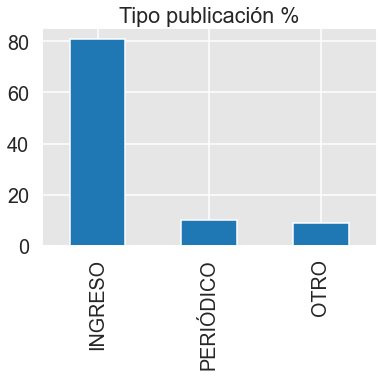

In [73]:
# gráfico de barras de frecuencias relativas.
plot = (100 * pjuridica['TIPO_PUBLICACION'].value_counts() / len(pjuridica['TIPO_PUBLICACION'])).plot(
kind='bar', title='Tipo publicación %')

In [81]:
pnatural_new['PATRIMONIO'] = pnatural_new['BIENES_PATRIMONIALES'].apply(cuentas)

In [82]:
pnatural_new['ACREENCIAS'] = pnatural_new['ACREENCIAS_OBLIGACIONES'].apply(cuentas)

In [83]:
pnatural_new.loc[pnatural_new["CONFL_INTERES_PARIENTES"].notnull(), "CONFL_INTERES_PARIENTES"] = 1

In [84]:
pnatural_new.loc[pnatural_new["CONFL_INTERES_DONACIONES"].notnull(), "CONFL_INTERES_DONACIONES"] = 1

In [85]:
pnatural_new.loc[pnatural_new["CONFL_INTERES_PARIENTES"].isnull(), "CONFL_INTERES_PARIENTES"] = 0

In [86]:
pnatural_new.loc[pnatural_new["CONFL_INTERES_DONACIONES"].isnull(), "CONFL_INTERES_DONACIONES"] = 0

In [90]:
pnatural_new.loc[pnatural_new["CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES"]=="NO", "CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES"] = 0

In [106]:
pnatural_new.loc[pnatural_new["CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES"]=="SÍ", "CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES"] = 1

In [93]:
pnatural_new.loc[pnatural_new["POSIBLE_CONFLICTO_INTERES_ADICIONAL"]=="NO", "POSIBLE_CONFLICTO_INTERES_ADICIONAL"] = 0

In [107]:
pnatural_new.loc[pnatural_new["POSIBLE_CONFLICTO_INTERES_ADICIONAL"]=="SÍ", "POSIBLE_CONFLICTO_INTERES_ADICIONAL"] = 1

In [96]:
pnatural_new=pnatural_new.drop(['BIENES_PATRIMONIALES','ACREENCIAS_OBLIGACIONES'],axis=1)

In [109]:
pnatural_new.head(10)

,NUMERO_DOCUMENTO,TIPO_PUBLICACION,NOMBRE_ENTIDAD,ENTIDAD_NO_ENCONTRADA_NOMBRE,DECLARANTE_ES_CONTRATISTA,CARGO_DECLARANTE,CARGO_NO_ENCONTRADO_DENOMINACION,TOTAL_INGRESOS,SALDO_BANCARIO,CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES,CONFL_INTERES_PARIENTES,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,PATRIMONIO,ACREENCIAS
0,1088004864,INGRESO,SERVICIO NACIONAL DE APRENDIZAJE,NaN,SI,NaN,NaN,17634000.0,0,0,0,0,0,15000000,0
1,65776977,INGRESO,SECRETARÍA DISTRITAL DE GOBIERNO,NaN,SI,NaN,NaN,6000000.0,7000,0,0,0,0,60000000,4500000
2,1102366838,INGRESO,ALCALDÍA DE FLORIDABLANCA,NaN,SI,NaN,NaN,51000000.0,20000,0,0,0,0,105000000,48000000
3,1093230050,INGRESO,ALCALDÍA DE SANTA ROSA DE CABAL,NaN,SI,NaN,NaN,3400000.0,0,0,0,0,0,0,0
4,30396723,INGRESO,NaN,SENA,SI,NaN,NaN,58000000.0,1332452,0,0,0,0,100000000,30000000
5,80410929,INGRESO,CONTRALORÍA GENERAL DE LA REPÚBLICA,NaN,SI,NaN,NaN,360000000.0,10000000,0,0,0,0,700000000,0
6,1002538086,INGRESO,NaN,ALCALDÍA DE NEIVA,SI,NaN,NaN,1500000.0,0,0,0,0,0,0,0
7,36346879,INGRESO,HOSPITAL DEL ROSARIO,NaN,SI,NaN,NaN,0.0,0,0,0,0,0,0,0
8,27315299,INGRESO,ALCALDÍA DE CUMBITARA,NaN,SI,NaN,NaN,0.0,2000,0,1,0,0,0,0
10,1114889573,OTRO,UNIDAD EJECUTORA DE SANEAMIENTO DEL VALLE DEL ...,NaN,SI,NaN,NaN,9425000.0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Persona natural contratista')

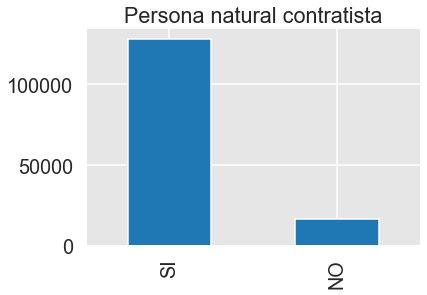

In [100]:
pnatural_new['DECLARANTE_ES_CONTRATISTA'].value_counts().plot(kind='bar')
plt.title("Persona natural contratista")

In [101]:
pnatural_new['DECLARANTE_ES_CONTRATISTA'].value_counts()

SI    128481
NO     16465
Name: DECLARANTE_ES_CONTRATISTA, dtype: int64

In [110]:
pnatural_new['CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES'].value_counts()

0    143166
1      1780
Name: CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES, dtype: int64

In [111]:
pnatural_new.describe(include=[object])

,NUMERO_DOCUMENTO,TIPO_PUBLICACION,NOMBRE_ENTIDAD,ENTIDAD_NO_ENCONTRADA_NOMBRE,DECLARANTE_ES_CONTRATISTA,CARGO_DECLARANTE,CARGO_NO_ENCONTRADO_DENOMINACION,CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES,CONFL_INTERES_PARIENTES,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,PATRIMONIO,ACREENCIAS
count,144946,144946,123139,36341,144946,4983,11974,144946,144946,144946,144946,144946,144946
unique,127753,4,2281,7897,2,194,28,2,2,2,2,15966,25379
top,80541200,INGRESO,SERVICIO NACIONAL DE APRENDIZAJE,SENA,SI,DIRECTOR ADMINISTRATIVO O FINANCIERO O TÉCNICO...,OTRO,0,0,0,0,0,0
freq,14,97521,24472,2437,128481,504,9829,143166,139172,143063,143747,76294,71251


In [115]:
pnatural_new = pnatural_new.astype({"PATRIMONIO": float})
pnatural_new = pnatural_new.astype({"ACREENCIAS": float})
pnatural_new.describe()

,TOTAL_INGRESOS,SALDO_BANCARIO,PATRIMONIO,ACREENCIAS
count,1.449460e+05,1.449460e+05,1.449460e+05,1.449460e+05
mean,6.769594e+07,1.099352e+12,1.950687e+39,7.253062e+25
std,1.446662e+09,3.437296e+14,7.426604e+41,2.761101e+28
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+07,3.915000e+02,0.000000e+00,0.000000e+00
50%,2.969000e+07,6.200000e+05,0.000000e+00,3.000000e+05
75%,5.210421e+07,4.000000e+06,7.000000e+07,2.292783e+07
max,2.561764e+11,1.306931e+17,2.827440e+44,1.051200e+31


In [127]:
pnatural_new["nconflictos"]= pnatural_new.iloc[:, -7:-3].sum(axis=1)

In [128]:
pnatural_new.head(10)

,NUMERO_DOCUMENTO,TIPO_PUBLICACION,NOMBRE_ENTIDAD,ENTIDAD_NO_ENCONTRADA_NOMBRE,DECLARANTE_ES_CONTRATISTA,CARGO_DECLARANTE,CARGO_NO_ENCONTRADO_DENOMINACION,TOTAL_INGRESOS,SALDO_BANCARIO,CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES,CONFL_INTERES_PARIENTES,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,PATRIMONIO,ACREENCIAS,nconflictos
0,1088004864,INGRESO,SERVICIO NACIONAL DE APRENDIZAJE,NaN,SI,NaN,NaN,17634000.0,0,0,0,0,0,15000000.0,0.0,0.0
1,65776977,INGRESO,SECRETARÍA DISTRITAL DE GOBIERNO,NaN,SI,NaN,NaN,6000000.0,7000,0,0,0,0,60000000.0,4500000.0,0.0
2,1102366838,INGRESO,ALCALDÍA DE FLORIDABLANCA,NaN,SI,NaN,NaN,51000000.0,20000,0,0,0,0,105000000.0,48000000.0,0.0
3,1093230050,INGRESO,ALCALDÍA DE SANTA ROSA DE CABAL,NaN,SI,NaN,NaN,3400000.0,0,0,0,0,0,0.0,0.0,0.0
4,30396723,INGRESO,NaN,SENA,SI,NaN,NaN,58000000.0,1332452,0,0,0,0,100000000.0,30000000.0,0.0
5,80410929,INGRESO,CONTRALORÍA GENERAL DE LA REPÚBLICA,NaN,SI,NaN,NaN,360000000.0,10000000,0,0,0,0,700000000.0,0.0,0.0
6,1002538086,INGRESO,NaN,ALCALDÍA DE NEIVA,SI,NaN,NaN,1500000.0,0,0,0,0,0,0.0,0.0,0.0
7,36346879,INGRESO,HOSPITAL DEL ROSARIO,NaN,SI,NaN,NaN,0.0,0,0,0,0,0,0.0,0.0,0.0
8,27315299,INGRESO,ALCALDÍA DE CUMBITARA,NaN,SI,NaN,NaN,0.0,2000,0,1,0,0,0.0,0.0,1.0
10,1114889573,OTRO,UNIDAD EJECUTORA DE SANEAMIENTO DEL VALLE DEL ...,NaN,SI,NaN,NaN,9425000.0,0,0,0,0,0,0.0,0.0,0.0


Text(0.5, 1.0, 'Tipos de conflicto declarados')

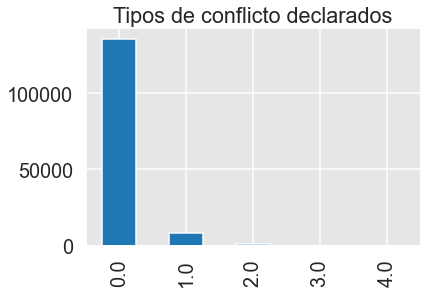

In [129]:
pnatural_new['nconflictos'].value_counts().plot(kind='bar')
plt.title("Tipos de conflicto declarados")

In [130]:
pnatural_new['nconflictos'].value_counts()

0.0    135676
1.0      8083
2.0      1020
3.0       155
4.0        12
Name: nconflictos, dtype: int64

In [131]:
pnatural_new[pnatural_new['NUMERO_DOCUMENTO']=='79790349']

,NUMERO_DOCUMENTO,TIPO_PUBLICACION,NOMBRE_ENTIDAD,ENTIDAD_NO_ENCONTRADA_NOMBRE,DECLARANTE_ES_CONTRATISTA,CARGO_DECLARANTE,CARGO_NO_ENCONTRADO_DENOMINACION,TOTAL_INGRESOS,SALDO_BANCARIO,CONYUGE_COMPANERO_PERMANENTE_PODRIA_GENERAR_CONFLICTO_INTERES,CONFL_INTERES_PARIENTES,CONFL_INTERES_DONACIONES,POSIBLE_CONFLICTO_INTERES_ADICIONAL,PATRIMONIO,ACREENCIAS,nconflictos
6774,79790349,INGRESO,FISCALIA GENERAL DE LA NACION,NaN,NO,NaN,OTRO,34255620.0,0,1,1,1,1,100000000.0,75000000.0,4.0


In [132]:
corr_matrix = pnatural_new.corr(method='pearson')
corr_matrix

,TOTAL_INGRESOS,SALDO_BANCARIO,PATRIMONIO,ACREENCIAS,nconflictos
TOTAL_INGRESOS,1.000000,0.000267,0.000060,0.004195,0.007490
SALDO_BANCARIO,0.000267,1.000000,-0.000008,-0.000008,-0.000597
PATRIMONIO,0.000060,-0.000008,1.000000,-0.000007,-0.000644
ACREENCIAS,0.004195,-0.000008,-0.000007,1.000000,0.008138
nconflictos,0.007490,-0.000597,-0.000644,0.008138,1.000000


In [133]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
23,nconflictos,ACREENCIAS,0.008138,0.008138
19,ACREENCIAS,nconflictos,0.008138,0.008138
4,TOTAL_INGRESOS,nconflictos,0.007490,0.007490
20,nconflictos,TOTAL_INGRESOS,0.007490,0.007490
3,TOTAL_INGRESOS,ACREENCIAS,0.004195,0.004195
15,ACREENCIAS,TOTAL_INGRESOS,0.004195,0.004195
14,PATRIMONIO,nconflictos,-0.000644,0.000644
22,nconflictos,PATRIMONIO,-0.000644,0.000644
21,nconflictos,SALDO_BANCARIO,-0.000597,0.000597
9,SALDO_BANCARIO,nconflictos,-0.000597,0.000597


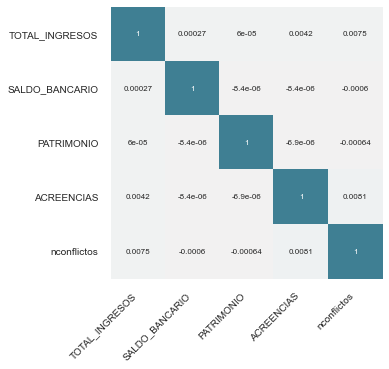

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Text(0.5, 1.0, 'Saldo bancario por número de conflictos')

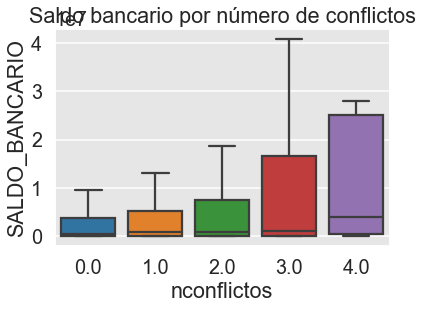

In [138]:
sns.boxplot(x = "nconflictos", y='SALDO_BANCARIO', data = pnatural_new,showfliers=False)
plt.title("Saldo bancario por número de conflictos")

Text(0.5, 1.0, 'Ingresos por número de conflictos')

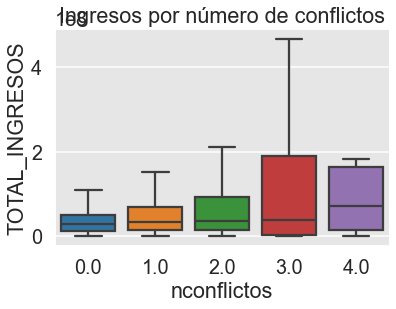

In [139]:
sns.boxplot(x = "nconflictos", y='TOTAL_INGRESOS', data = pnatural_new,showfliers=False)
plt.title("Ingresos por número de conflictos")

Text(0.5, 1.0, 'Patrimonio por número de conflictos')

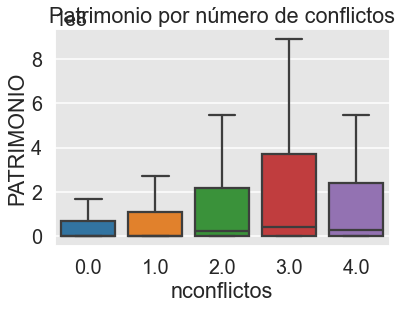

In [140]:
sns.boxplot(x = "nconflictos", y='PATRIMONIO', data = pnatural_new,showfliers=False)
plt.title("Patrimonio por número de conflictos")

Text(0.5, 1.0, 'Acreencias por número de conflictos')

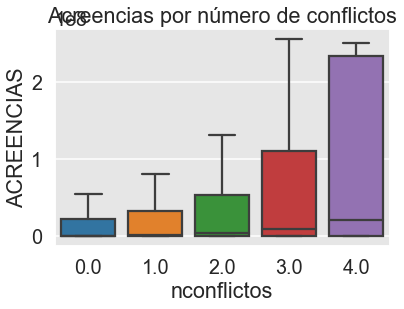

In [141]:
sns.boxplot(x = "nconflictos", y='ACREENCIAS', data = pnatural_new,showfliers=False)
plt.title("Acreencias por número de conflictos")